<a href="https://colab.research.google.com/github/richeym-umich/workshops/blob/main/Machine_Learning_Tools_and_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Scikit-Learn Example
In the following example, we'll go through importing some python libraries and working with a provided dataset to demonstrate a simple computer vision problem

To start, we'll import some essential libraries for visualizing our results and working with provided datasets. Note that we also import an svm classifier.

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

Next, we import the digits dataset. This dataset contains images of handwritten digits. In this example, we'll be teaching a machine to recognize the handwritten digits.

In [2]:
digits = datasets.load_digits()

Using matplotlib, we can visualize some of our training data that we just imported. These images have labels that are shown above the image

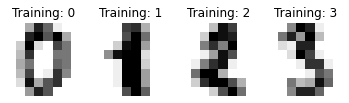

In [23]:
_, axes = plt.subplots(1,4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image,label) in zip(axes[:], images_and_labels[:4]):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
  ax.set_title('Training: %i' % label)

Next, we prepare our data for training by putting it into the correct format for an svm classifier. 

In [12]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

We create an SVC classifier with a gamma value of .001. Gamma dictates how to scale each feature that is being considered.

In [13]:
classifier = svm.SVC(gamma=.001)

After creating the classifier, we split our data in training data and testing data. This is done by a predefined function, where we dictate how large of a testing size to have. Then, we fit our classifier to our data. 

In [14]:
x_train, x_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=False)
classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Once the classifier is fit to the training data, we can test it with test data by calling the predict function. 

In [15]:
predicted = classifier.predict(x_test)

Finally, we visualize some predictions of the test data. 

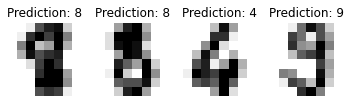

In [22]:
_, axes = plt.subplots(1,4)
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[:], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)